In [28]:
# Autor: Ricardo Roberto de Lima - Profº - Unipê - Centro Universitário de João Pessoa
# Ciência de Dados com Python + Pandas, Numpy, SkLearning.
# Machine Learning - Aula 01

#Importando a biblioteca pandas para carregar e visualizar a base de dados
import pandas as pd

In [29]:
# Carregando um banco de dados em um DataFrame chamdo passageiros
passageiros = pd.read_csv('Passageiros.csv')

In [30]:
# Exibindos as primeiras linhas do meu dataframe
passageiros.head()

,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [31]:
# exibindo as ultimas linhas do dataframe
passageiros.tail()

,tempo,nPassageiros
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


In [32]:
# Exibindo os dados estatisticos do DataFrame
passageiros.describe()

,tempo,nPassageiros
count,144.000000,144.000000
mean,1954.958333,280.298611
std,3.476109,119.966317
min,1949.000000,104.000000
25%,1951.979167,180.000000
50%,1954.958333,265.500000
75%,1957.937500,360.500000
max,1960.916667,622.000000


In [33]:
#Com as bibliotecas seaborn e matplotlib vamos conseguir gerar gráficos para visualizar a base de dados. 
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='tempo', ylabel='nPassageiros'>

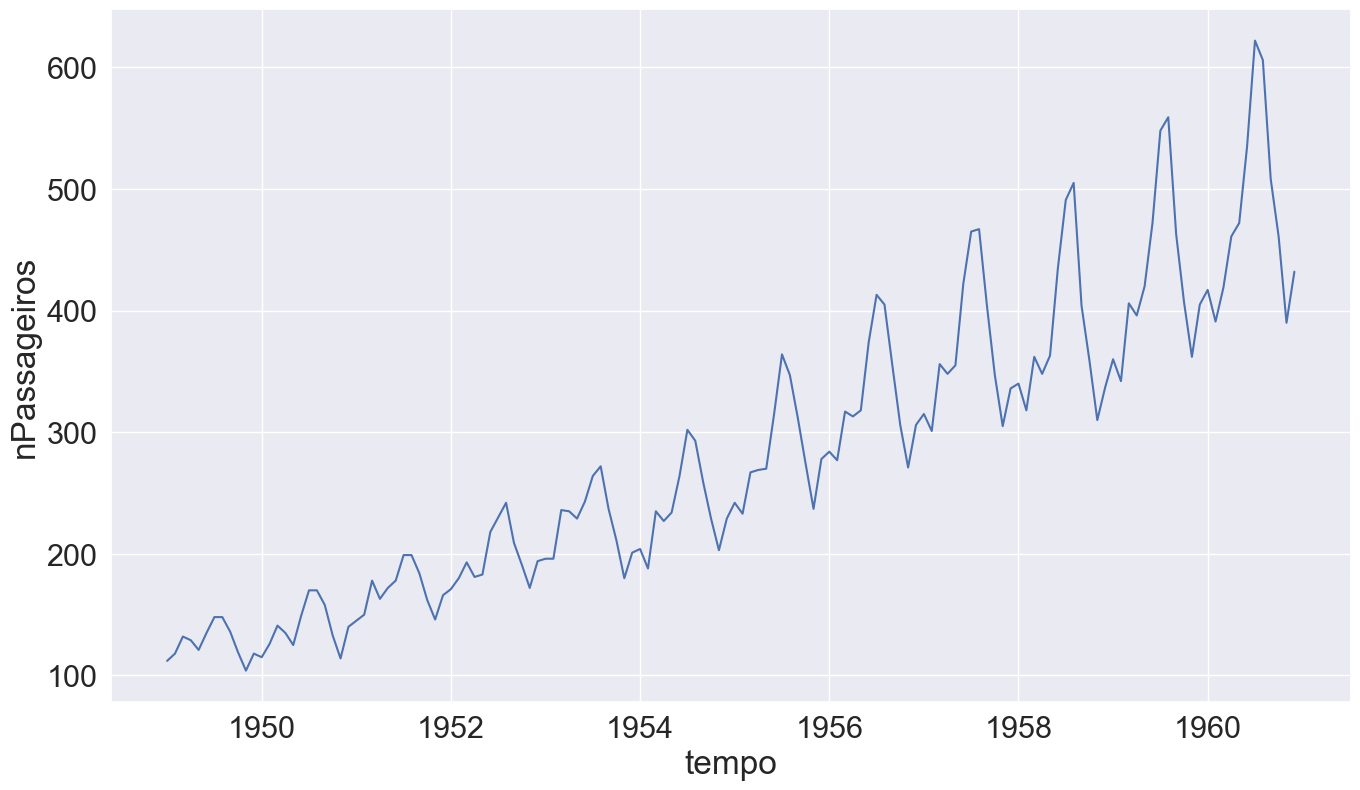

In [34]:
#Grafico de linhas de um modelo de regressão entre o tempo e o numeros de passageiros.
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="tempo", y="nPassageiros", data=passageiros)

In [35]:
#Seleciona todas as colunas menos a última
# Seleciona as colunas que você desejar
Tempo = passageiros.iloc[:,:-1].values

In [36]:
# Seleciona as linha que você desejar
nPassageiros = passageiros.iloc[:,1].values

In [37]:
#Podemos separar parte dos dados para treino e teste
from sklearn.model_selection import train_test_split

In [38]:
# Dividindo o banco de dados em 70% para treino e 30% para testar.
# 0.3 = 30% do banco de dados
Tempo_treino, Tempo_teste, nPassageiros_treino, nPassageiros_teste = train_test_split(Tempo, nPassageiros, 
                                                                                      test_size = 0.3)

In [39]:
from sklearn import linear_model

In [49]:
regressor = linear_model.LinearRegression()

In [41]:
#Ajustando a reta aos dados de treino
regressor.fit(Tempo_treino,nPassageiros_treino)

LinearRegression()

In [50]:
nPassageiros_predito = regressor.predict(Tempo_teste)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [51]:
import numpy as np

In [52]:
#Colocando os dados em um data frame para posteriormente gerar uma figura com o 
# Seaborn
passageiros_predito = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_predito,
             })
passageiros_teste = pd.DataFrame({'Tempo': np.ndarray.flatten(Tempo_teste),
                                    'nPassageiros': nPassageiros_teste,
             })


<AxesSubplot:xlabel='Tempo', ylabel='nPassageiros'>

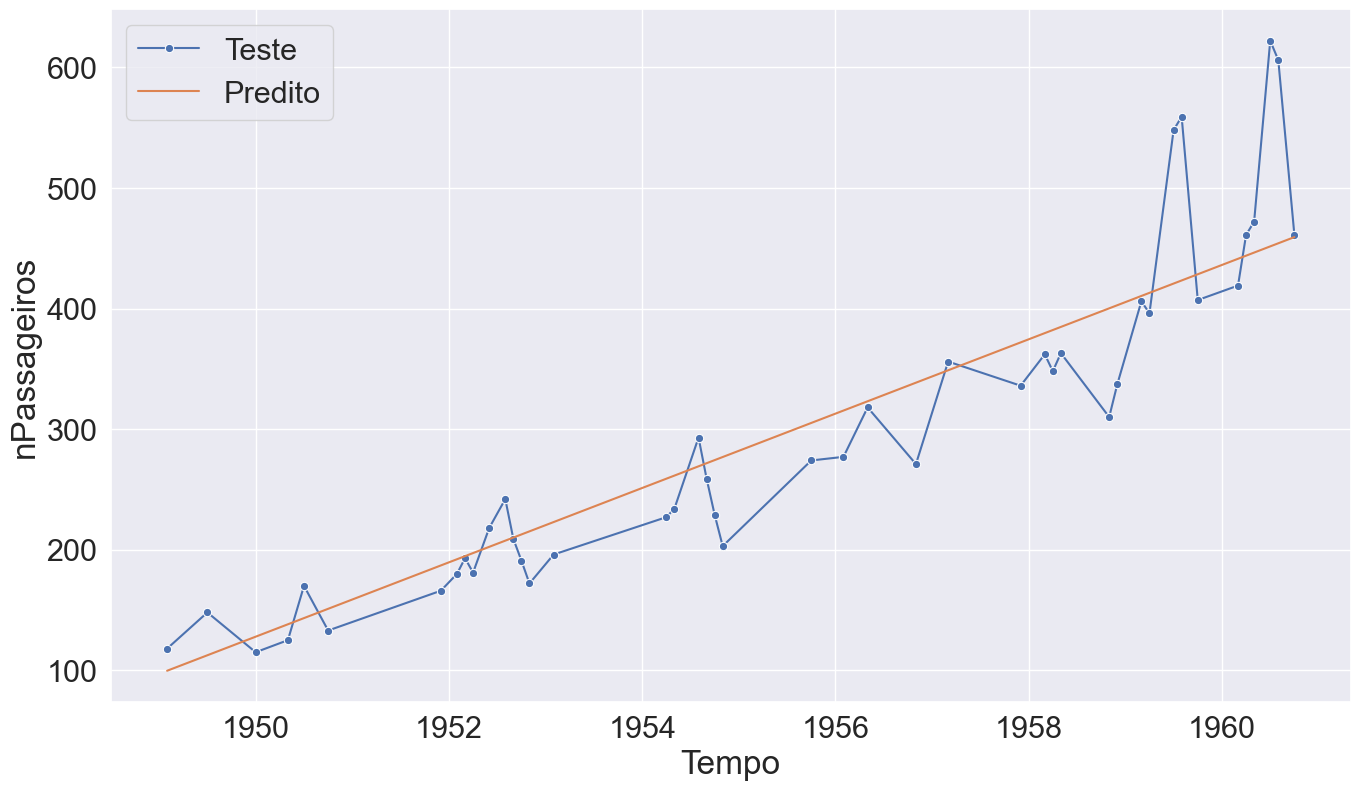

In [53]:
plt.figure(figsize = (16,9))
sns.set(font_scale=2)
sns.lineplot(x="Tempo", y="nPassageiros", data = passageiros_teste,  marker='o', label = "Teste")
sns.lineplot(x='Tempo', y='nPassageiros', data = passageiros_predito, label = "Predito" )

In [54]:
# Coeficientes
print('Coeficiente: \n', regressor.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [55]:
# MSE (mean square error)
print("MSE: %.2f" % np.mean((regressor.predict(Tempo) - nPassageiros) ** 2))

# Score de variação: 1 representa predição perfeita
print('Score de variação: %.2f' % regressor.score(Tempo, nPas))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

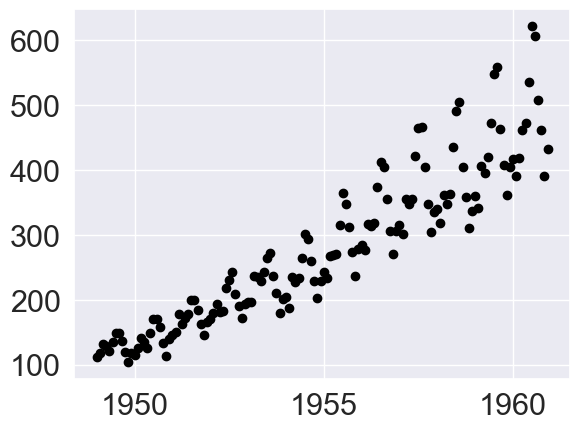

In [56]:
# Scatter Plot representando a regressão linear
plt.scatter(Tempo, nPassageiros,  color = 'black')
plt.plot(Tempo, regressor.predict(Tempo), color = 'blue', linewidth = 3)
plt.xlabel('Tempo')
plt.ylabel('N. Passageiros')
plt.xticks(())
plt.yticks(())

plt.show()